In [2]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [24]:
df_US = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

In [25]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist() #usando .index[:6] basicamente le dices que solo te muestre desde el index de jtshort que te muestre los 6 que más figuran. Recordando que para eso ocupamos value_counts, para que tome en consideración y vaya del mayor al menor numero de trabajos. Luego ocupamos .tolist para pasarlo de una Serie a lista.

# Recordar que debo cambiar todo al ingles 

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [26]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [27]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index #index es para que no te muestre los numeros, solo los nombres!

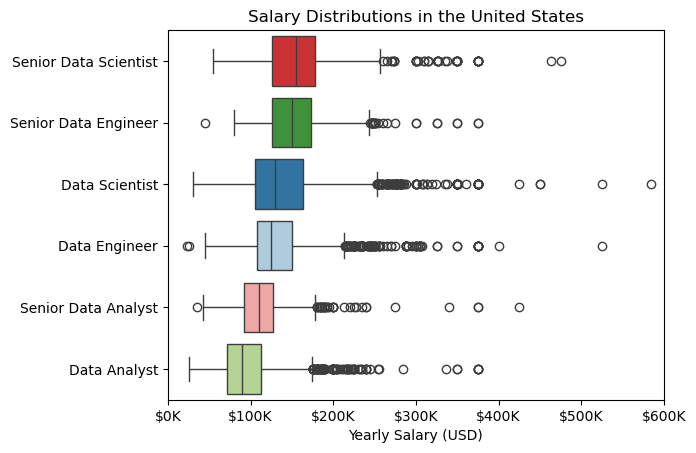

In [40]:
color = sns.color_palette('Paired', n_colors=6)

sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order, hue='job_title_short', palette=color, legend=False)

plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)

plt.show()